# 1. Installation

## 1.0 What's the relation between python, anaconda, torch, cuda, etc.?

- **Python**: A programming language. On a computer, it usually appears as a package or software. We use it to program.
- **(Virtual) Environment**: To program, you need "several packages + python" with specific versions (Most packages are updated over time, so some of your projects need one version of the package, and some projects need another version, otherwise an error will be reported). This combination is called environment.
- **Anaconda**: A software for creating and managing different environments.
- **pip**: A tool for downloading different packages (you can also use anaconda for downloading, they are similar on this feature).
- **Jupyter**: A software that integrates multiple functions to make it easier to write and run Python programs on your computer.
  - A program on Jupyter contains "An environment created by anaconda" + "python codes written by you"
- **GPU**: A piece of hardware that can speed up deep learning programs (exists on most computers).
- **Pytorch**: PyTorch is an open-source Python machine learning library (i.e., package) that provides machine learning and GPU support.
- **CUDA**: CUDA (Compute Unified Device Architecture) is a parallel computing software developed by NVIDIA. In order to use the GPU, we **sometimes** need to install it with a specific version.

## 1.1 Installation on your computer

### 1.1.1 Download Anaconda3
- https://www.anaconda.com/download (latest)
- https://repo.anaconda.com/archive (old version)
- Choose the file corresponding to your own computer if needed (Windows/MacOSX/Linux). 

### 1.1.2 Open and use your anaconda terminal：
- For windows：Search (win+s) "anaconda prompt" and open it.
- For Linux/Mac：Directly open your "terminal" software on your computer.

### 1.1.3 Check and download your python environment, 
- Environment Setup.  <br>
E.g., environment name: myenv; python version: 3.8;  <br>
Note: Lines that start with "#" are comments, and you **don't need to run them**
```python
# create virtual environment
conda create -n myenv python=3.8 -y
# activate virtual environment
conda activate myenv
# install packages used in this class in your environment
# (this torch is a cpu version pytorch)
pip install pywinpty==2.0.13 jupyter==1.0.0 d2l torch torchvision ipykernel==6.29.5
# Make your virtual environment available to jupyter notebook
python -m ipykernel install --user --name myenv
```
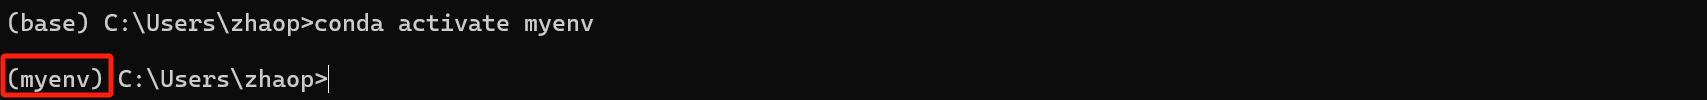
- **Note**: Before all the subsequent package installation and program running proceed, make sure that you have entered your environment
- **(Optional)** Install a gpu version pytorch if your computer contains a NVIDIA GPU  (can accelerate the computation, recommended but not necessary) <br>
(How can I tell if my computer has an Nvidia GPU? Please google by yourself, because different computers have different methods) <br>

    - First, if you have installed cpu version of pytorch, you should uninstall your cpu version pytorch <br>
    `pip uninstall torch`<br>

    - Then, check your **CUDA driver version** <br>
    `nvidia-smi` <br>
    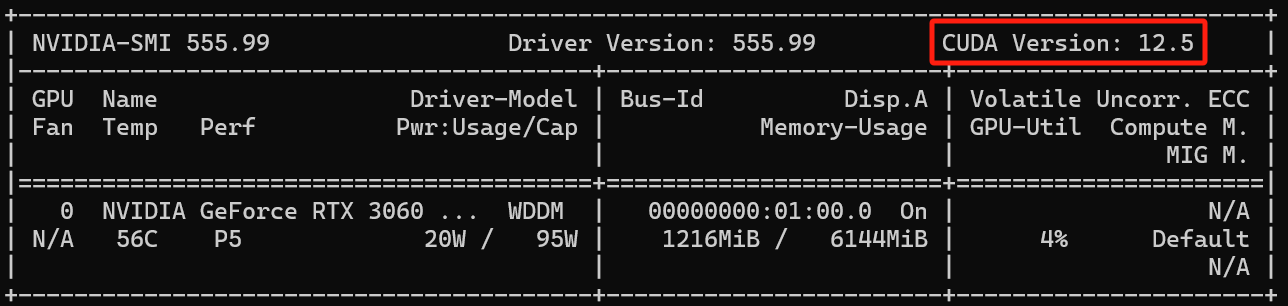

    - Then install a gpu version pytorch and CUDA ToolKit. (They work together.) <br>
    E.g., pytorch version 1.12.0; cudatoolkit version 11.3 <br>
    (cudatoolkit version should be less than or equal to your CUDA driver version)  <br>
    `conda install pytorch==1.12.0 torchvision==0.13.0 torchaudio==0.12.0 cudatoolkit=11.3 -c pytorch`<br>

    - Check if the gpu version of pytorch can work with your gpu <br>
        ```python
        python
        import torch
        # Return True if successful, False otherwise
        torch.cuda.is_available()
        # quit python
        quit()
        ```
        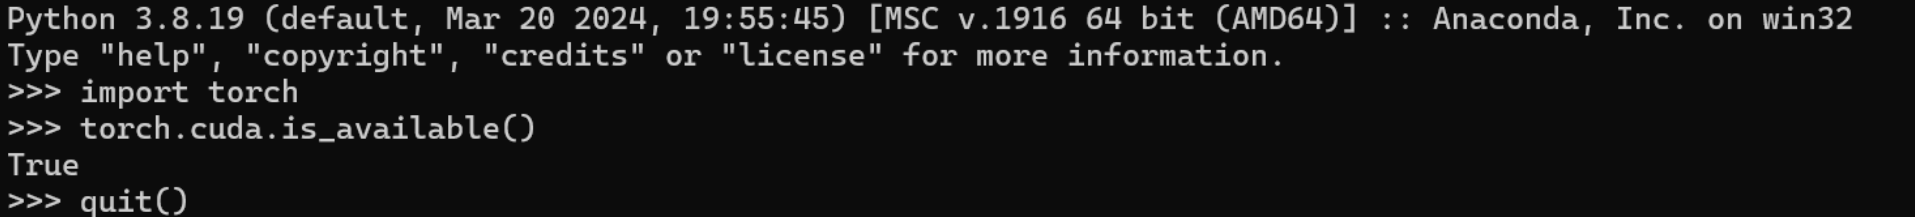
        If False, you can still use pytorch. However, GPU-related operations cannot be used.<br>
        You can also try another version of pytorch in https://pytorch.org/get-started/previous-versions/<br>

### 1.1.4 Open jupyter notebook
- First, go to any directory where your code file will be stored if needed. <br>
`cd <directory>`

- Then open your jupyter notebook <br>
```
# activate virtual environment first if it's not activated yet.
# conda activate myenv
# open your jupyter notebook
jupyter notebook
```

- If something wrong: <br>
    - No module named 'jinja2': <br>
      `pip install jinja2` <br>
    - No module named 'yaml': <br>
      `pip install pyyaml` <br>
    - No module named 'chardet': <br>
      `pip install chardet` <br>

- Create a python manuscript with myenv virtual environment<br>
File -> New -> Notebook -> Kernel: myenv -> Now you can start coding <br>
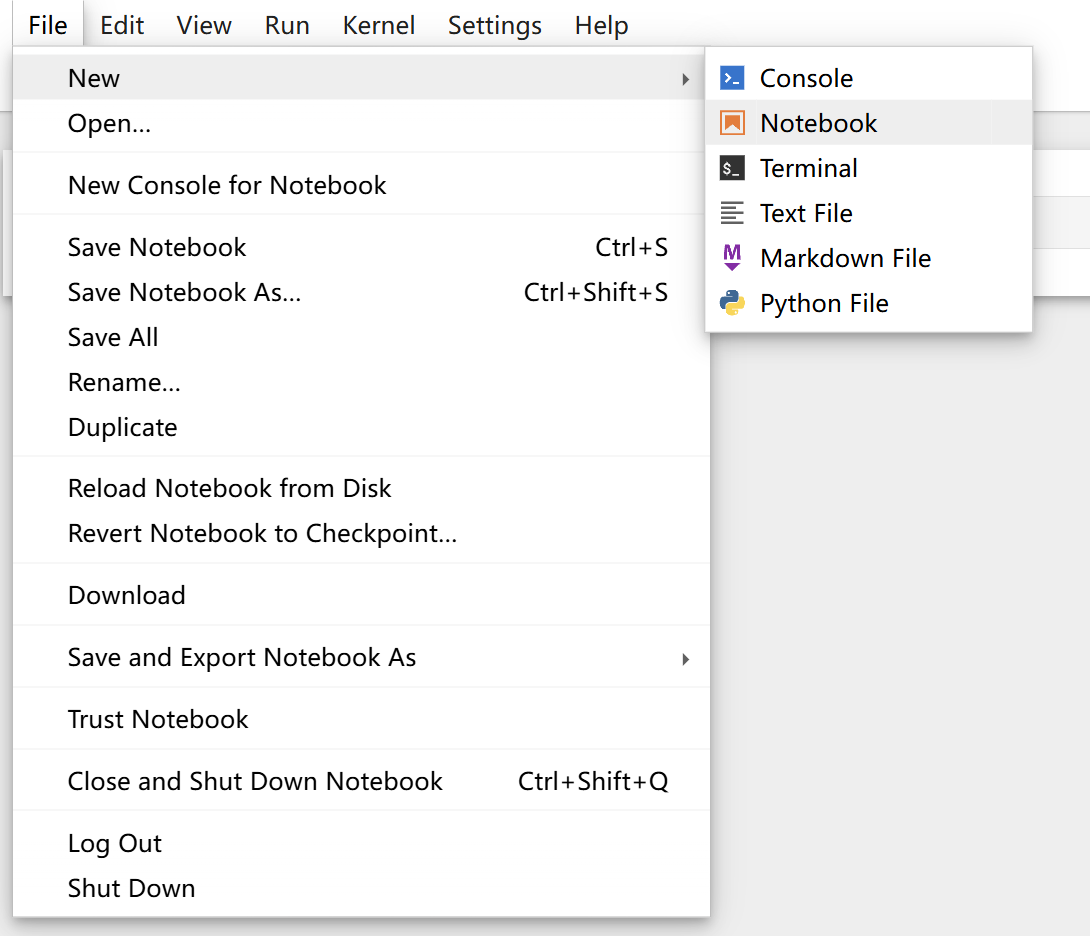


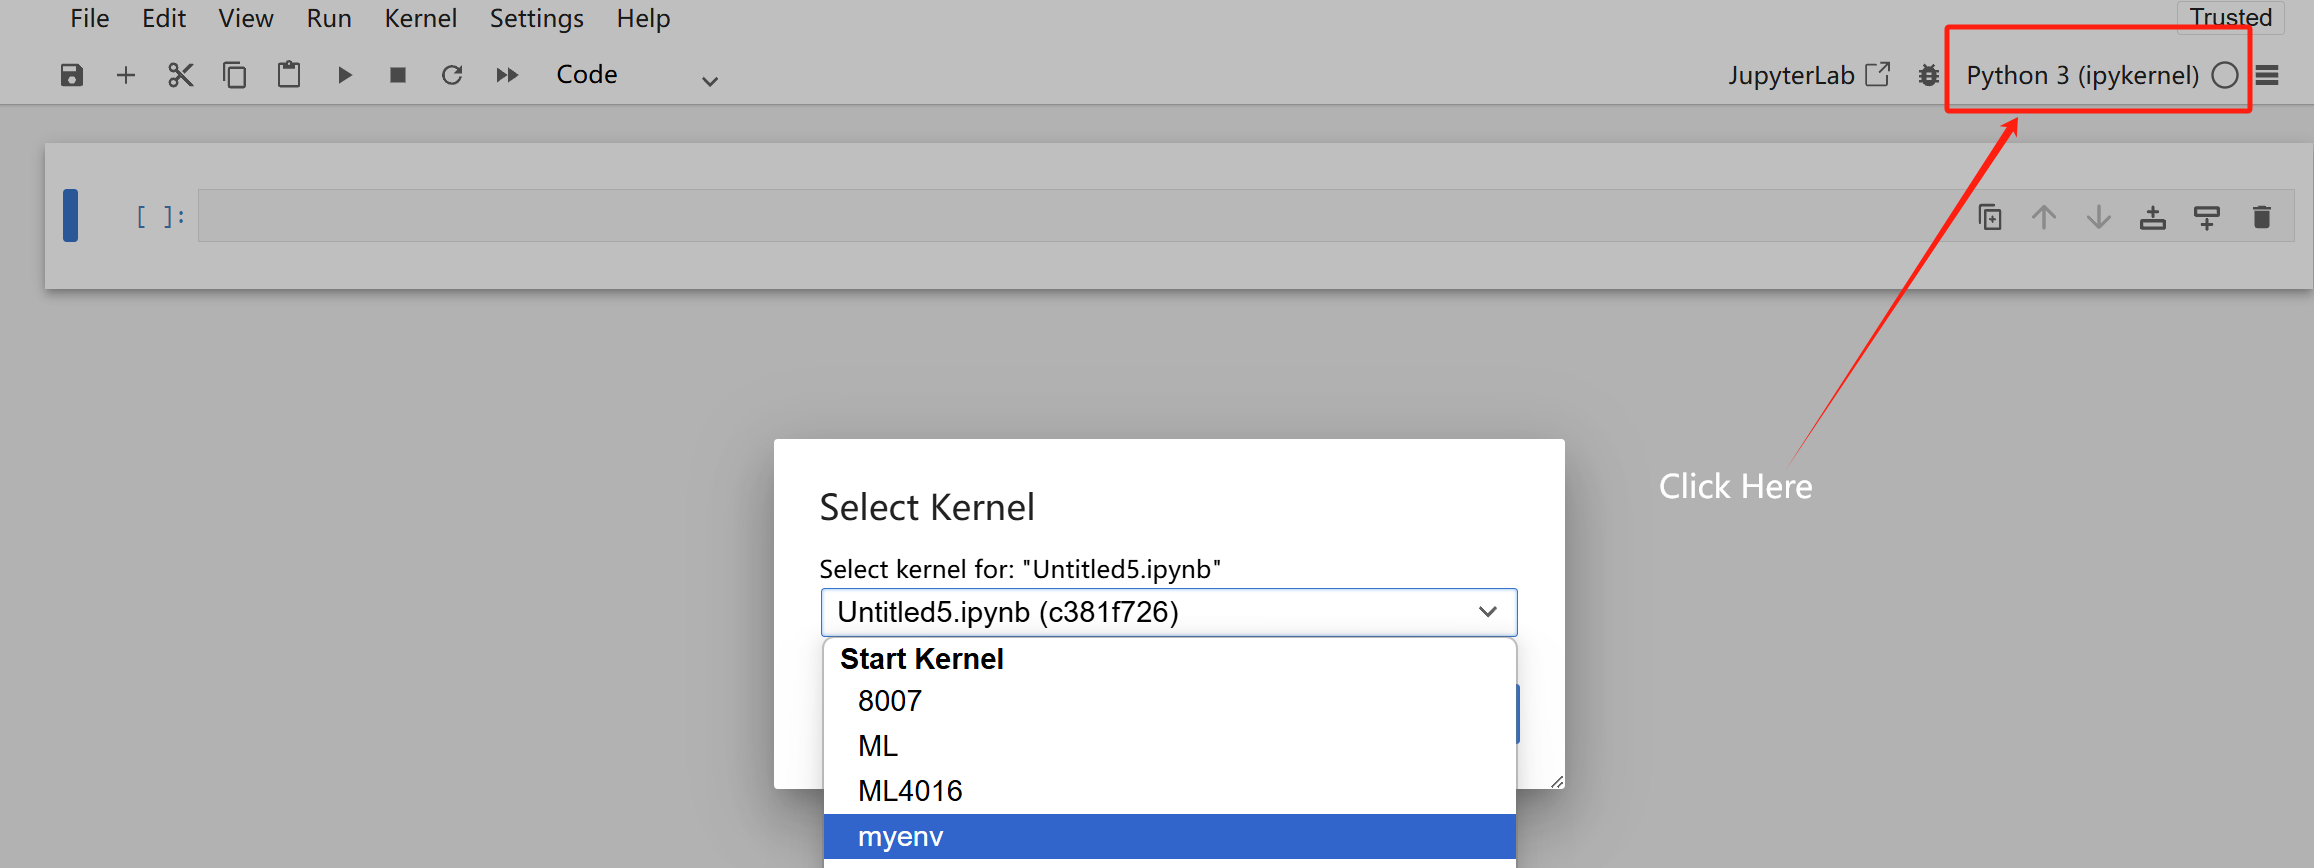

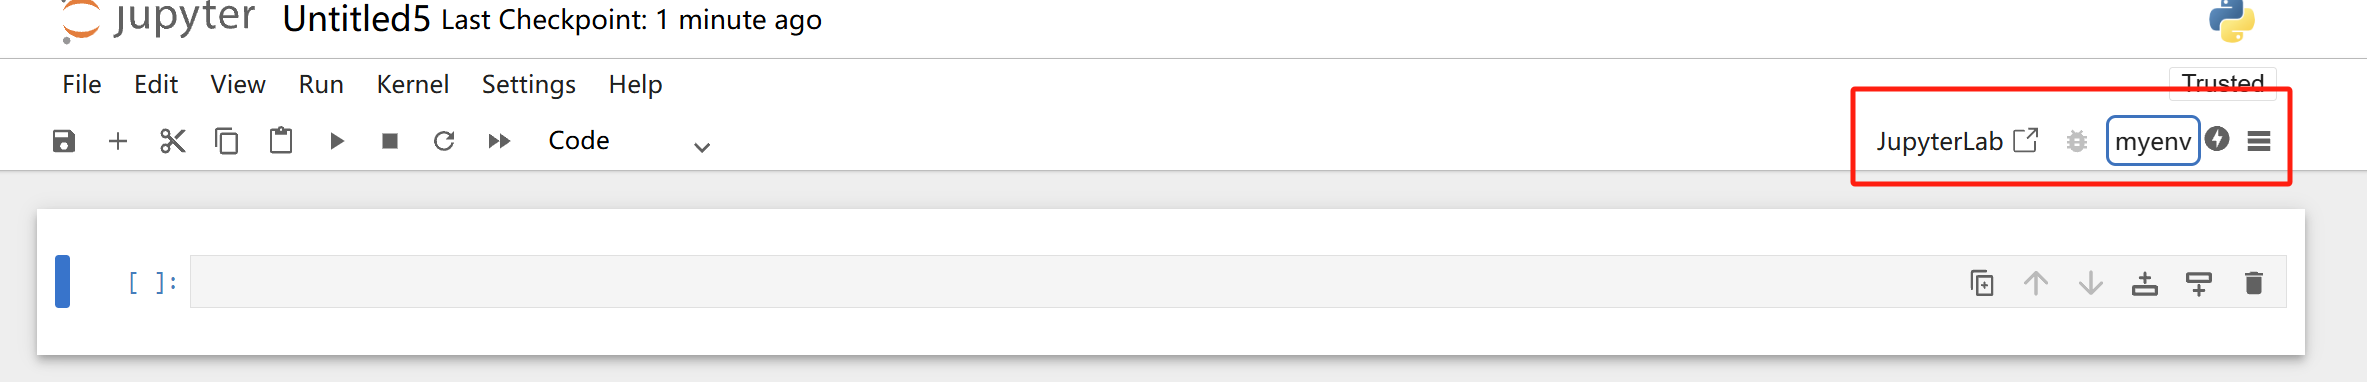
To execute your code, you can click the button "run" or press "ctrl+enter"
- Note: Save your code when leaving jupyter!!! File -> Save Notebook

### 1.1.5 (Optional) Additional Note: Basic use of anaconda
- Create virtual environment with a specific python version: <br>
`conda create -n <environment name> python=<python version> -y`
    - **Note**: The word in <> represents a variable that varies according to the context. E.g., conda create -n myenv python=3.8 -y
- Activate your virtual environment when you want to use it: <br>
`conda activate <environment name>`
- Exit from your virtual environment when you don't use it: <br>
`conda deactivate`
- Permanently remove your unused virtual environment <br>
(**It will be completely deleted from the computer!!!**): <br>
`conda remove -n <environment name> --all`

- install packages using pip： <br>
`pip install <package>` <br>
`pip install <package>==<version>`
- find available versions that can be installed for a package using pip:<br>
`pip install <package>==`
- uninstall packages using pip: <br>
`pip uninstall <package>`

- install packages using conda: <br>
(some packages could be found through both pip and conda, <br>
but some packages could be found through one of them. Both are OK) <br>
`conda install <package>` <br>
`conda install <package>==<version>`
- find available versions that can be installed for a package using conda:<br>
`conda search <package>`
- uninstall packages using conda: <br>
`conda uninstall <package>`

### 1.1.6 (Optional) Additional Note
- Official links for pytorch installation: <br>
https://pytorch.org/get-started/previous-versions/ (old version)<br>
https://pytorch.org/get-started/locally/ (latest)<br>
- Offical tutorial about anaconda installation:<br>
https://docs.anaconda.com/anaconda/install/windows/  <br>
https://docs.anaconda.com/anaconda/install/mac-os/  <br>
https://docs.anaconda.com/anaconda/install/linux/  <br>

## 1.2 Colab method

Here is another way to run the code if you don't want to install pytorch by yourself. <br>
https://colab.research.google.com/ <br>
-> File -> New Notebook -> Now you can start coding <br>
Note: pytorch is already installed and you can directly use it!
```python
# try to import pytorch, default version is cpu
import torch
# installing d2l
!pip install git+https://github.com/d2l-ai/d2l-zh@release
```
- To execute your code, you can click the button on the left of your code or press "ctrl+enter"
- If you want to use the gpu version of pytorch, choose: -> Runtime -> Change runtime type

# 2. Data Manipulation

## 2.1 Getting Started

In [1]:
import torch

In [2]:
# create a vector from 0 to 12, including the first 0 but not including the last 12.
x = torch.arange(12, dtype=torch.float32)
x

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [3]:
# return vector shape
x.shape

torch.Size([12])

In [4]:
# return the total number of elements in x
x.numel()

12

In [5]:
# reshape x into the given format (3 row 4 column)
X = x.reshape(3, 4)
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

In [6]:
# tensor is a data format created by pytorch, it could be a value/vector/matrix
# create a matrix with element 0
torch.zeros((2, 3, 4))

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [7]:
# create a matrix with element 1
torch.ones((2, 3, 4))

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

In [8]:
# create a matrix with given values
torch.tensor([[2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])

tensor([[2, 1, 4, 3],
        [1, 2, 3, 4],
        [4, 3, 2, 1]])

## 2.2 Operations

In [9]:
x = torch.tensor([1.0, 2, 4, 8])
y = torch.tensor([2, 2, 2, 2])
# element-wise plus, minus, multiply, divide, power
x + y, x - y, x * y, x / y, x ** y  # The ** operator is exponentiation

(tensor([ 3.,  4.,  6., 10.]),
 tensor([-1.,  0.,  2.,  6.]),
 tensor([ 2.,  4.,  8., 16.]),
 tensor([0.5000, 1.0000, 2.0000, 4.0000]),
 tensor([ 1.,  4., 16., 64.]))

In [10]:
# exponentiation
torch.exp(x)

tensor([2.7183e+00, 7.3891e+00, 5.4598e+01, 2.9810e+03])

In [11]:
X = torch.arange(12, dtype=torch.float32).reshape((3,4))
Y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
# concatenation along dimension 0 
torch.cat((X, Y), dim=0)

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [ 2.,  1.,  4.,  3.],
        [ 1.,  2.,  3.,  4.],
        [ 4.,  3.,  2.,  1.]])

In [12]:
# concatenation along dimension 1 
torch.cat((X, Y), dim=1)

tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
        [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
        [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]])

In [13]:
# element-wise logic
X == Y

tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])

In [14]:
# the sum of all the elements
X.sum()

tensor(66.)

## 2.3 Broadcasting Mechanism

In [15]:
# Some functions can be used even if two variables have different shapes 
a = torch.arange(3).reshape((3, 1))
b = torch.arange(2).reshape((1, 2))
a, b

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]))

In [16]:
# Automatically expand the their size and then compute output
a + b

tensor([[0, 1],
        [1, 2],
        [2, 3]])

## 2.4 Indexing and Slicing

In [17]:
# obtain value/slice of a tensor
# Note: contain the start value, don't contain the end value
# Minus one is the last one
X, X[-1], X[1:3]

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]),
 tensor([ 8.,  9., 10., 11.]),
 tensor([[ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]))

In [18]:
# Give it a new value in the position of row 1 column 2
X[1, 2] = 9
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  9.,  7.],
        [ 8.,  9., 10., 11.]])

In [19]:
# Assign a same value to a slice
X[0:2, :] = 12
X

tensor([[12., 12., 12., 12.],
        [12., 12., 12., 12.],
        [ 8.,  9., 10., 11.]])

## 2.5 Saving Memory

In [20]:
# id funtion returns the address of a variable
before = id(Y)
Y = Y + X
# address has been changed. Y has been given a new address.
id(Y) == before

False

In [21]:
# create a new matrix with the same shape as Y
Z = torch.zeros_like(Y)
print(Z)
print('id(Z):', id(Z))
# use inplace operation, doesn't change the address of Z
Z[:] = X + Y
print('id(Z):', id(Z))

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
id(Z): 1486148815424
id(Z): 1486148815424


In [22]:
before = id(X)
# inplace operation
X += Y
id(X) == before

True

## 2.6 Conversion to Other Python Objects

In [23]:
# change variable class between 
# numpy (format usually used by codes that run in a cpu environment) 
# and torch tensor (format used by codes that run in a gpu environment)
A = X.numpy()
B = torch.from_numpy(A)
type(A), type(B)

(numpy.ndarray, torch.Tensor)

In [24]:
a = torch.tensor([3.5])
# Transformation between value and vector
a, a.item()
# Transformation between different data types
float(a), int(a)

(3.5, 3)

# 3. Data Preprocessing

## 3.1 Reading the Dataset

In [25]:
import os
# "./" means the current folder
# ./data
os.makedirs(os.path.join('.', 'data'), exist_ok=True)
# ./data/house_tiny.csv
data_file = os.path.join('.', 'data', 'house_tiny.csv')
# NA means missing data
with open(data_file, 'w') as f:
    f.write('NumRooms,Viewed,Alley,Price\n')  # Column names
    f.write('NA,3,Pave,127500\n')  # Each row represents a data example
    f.write('2,3,NA,106000\n')
    f.write('4,NA,NA,178100\n')
    f.write('NA,3,NA,140000\n')

In [26]:
# If pandas is not installed, just uncomment the following line:
# !pip install pandas

# pandas is usually used for data loading and processing
import pandas as pd

data = pd.read_csv(data_file)
# NaN means missing data
print(data)

   NumRooms  Viewed Alley   Price
0       NaN     3.0  Pave  127500
1       2.0     3.0   NaN  106000
2       4.0     NaN   NaN  178100
3       NaN     3.0   NaN  140000


## 3.2 Handling Missing Data

In [27]:
a, b = data.iloc[:, :2], data.iloc[:, 2:]
# fill the missing data with the given data (mean of each column)
a = a.fillna(a.mean())
print(a)

   NumRooms  Viewed
0       3.0     3.0
1       2.0     3.0
2       4.0     3.0
3       3.0     3.0


In [28]:
print(b)

  Alley   Price
0  Pave  127500
1   NaN  106000
2   NaN  178100
3   NaN  140000


In [29]:
# classify different category of strings, NaN is treated as one category
b = pd.get_dummies(b, dummy_na=True)
print(b)

    Price  Alley_Pave  Alley_nan
0  127500        True      False
1  106000       False       True
2  178100       False       True
3  140000       False       True


## 3.3 Conversion to the Tensor Format

In [30]:
#convert to tensor format
import torch
X, y =  
X, y

(array([[3., 3.],
        [2., 3.],
        [4., 3.],
        [3., 3.]]),
 tensor([[127500,      1,      0],
         [106000,      0,      1],
         [178100,      0,      1],
         [140000,      0,      1]], dtype=torch.int32))